In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
pd.options.display.max_columns = None
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
df = pd.read_csv('Datasets\deptos_limpios.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26189 entries, 0 to 26188
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    26189 non-null  int64  
 1   monto                 26189 non-null  int64  
 2   superficie_t          26189 non-null  float64
 3   dormitorios           26189 non-null  int64  
 4   dormitorios_faltante  26189 non-null  int64  
 5   banos                 26189 non-null  int64  
 6   banos_faltante        26189 non-null  int64  
 7   antiguedad            26189 non-null  int64  
 8   antiguedad_faltante   26189 non-null  int64  
 9   Or_N                  26189 non-null  int64  
 10  Or_S                  26189 non-null  int64  
 11  Or_E                  26189 non-null  int64  
 12  Or_O                  26189 non-null  int64  
 13  Or_Faltante           26189 non-null  int64  
 14  terraza               26189 non-null  float64
 15  estacionamiento    

In [4]:
df.describe()

,id,monto,superficie_t,dormitorios,dormitorios_faltante,banos,banos_faltante,antiguedad,antiguedad_faltante,Or_N,Or_S,Or_E,Or_O,Or_Faltante,terraza,estacionamiento,bodegas,flag_Departamento,flag_Multinivel,flag_Semipiso,flag_Premium,flag_Monoambiente,flag_Loft,latitud,longitud
count,26189.00,26189.00,26189.00,26189.00,26189.00,26189.00,26189.00,26189.00,26189.00,26189.00,26189.00,26189.00,26189.00,26189.00,26189.00,26189.00,26189.00,26189.00,26189.00,26189.00,26189.00,26189.00,26189.00,26189.00,26189.00
mean,2246794806.93,7487.09,133.82,2.31,0.03,1.97,0.09,12.07,0.22,0.24,0.22,0.15,0.33,0.35,17.49,0.86,0.54,0.91,0.02,0.04,0.01,0.01,0.01,-33.44,-70.62
std,627729836.95,8980.19,1921.43,1.04,0.16,1.02,0.28,12.54,0.41,0.43,0.41,0.36,0.47,0.48,220.81,1.03,0.55,0.28,0.12,0.20,0.11,0.10,0.07,0.04,0.05
min,1359204515.00,15.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,-33.65,-70.83
25%,1580479353.00,2331.00,44.00,2.00,0.00,1.00,0.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,-33.46,-70.65
50%,2751877688.00,3920.00,65.00,2.00,0.00,2.00,0.00,9.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,-33.44,-70.62
75%,2850889636.00,8600.00,115.00,3.00,0.00,2.00,0.00,15.00,0.00,0.00,0.00,0.00,1.00,1.00,10.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,-33.42,-70.58
max,2864912270.00,120000.00,292675.00,8.00,1.00,10.00,1.00,209.00,1.00,1.00,1.00,1.00,1.00,1.00,32543.00,10.00,5.00,1.00,1.00,1.00,1.00,1.00,1.00,-33.28,-70.49


In [5]:
df.sample(10)

,id,monto,superficie_t,dormitorios,dormitorios_faltante,banos,banos_faltante,antiguedad,antiguedad_faltante,Or_N,Or_S,Or_E,Or_O,Or_Faltante,terraza,estacionamiento,bodegas,flag_Departamento,flag_Multinivel,flag_Semipiso,flag_Premium,flag_Monoambiente,flag_Loft,latitud,longitud,comuna,calle
6485,2854072740,1900,38.00,1,0,1,0,8,0,0,1,0,0,0,4.00,0,1,1,0,0,0,0,0,-33.43,-70.67,Santiago,Avenida Presidente Balmaceda
4060,1538146239,29800,396.00,5,0,5,0,9,1,0,0,0,0,1,150.00,3,1,1,0,0,0,0,0,-33.37,-70.51,Las Condes,Fray León
6530,1575798431,1650,30.00,1,0,1,0,17,0,0,1,0,0,0,0.00,0,1,1,0,0,0,0,0,-33.43,-70.67,Santiago,Avenida Ricardo Cumming
2,1533761523,21000,470.00,3,0,4,0,6,0,1,1,1,1,0,330.00,5,1,1,0,0,0,0,0,-33.40,-70.58,Vitacura,Cardenal Belarmino
22477,1589114289,3990,72.00,3,0,2,0,30,0,0,0,0,1,0,2.00,0,0,1,0,0,0,0,0,-33.44,-70.64,Santiago,José Victorino Lastarria
19319,1585267873,2290,43.00,2,0,1,0,6,0,1,0,0,0,0,2.00,1,1,1,0,0,0,0,0,-33.51,-70.66,San Miguel,Quinta Avenida
3188,2836212052,1350,26.00,2,1,1,0,0,0,0,0,0,1,0,0.00,0,1,0,0,0,0,1,0,-33.47,-70.65,Santiago,Sargento Aldea
15212,2684071388,13500,196.00,3,0,3,0,33,0,1,1,1,0,0,30.00,2,1,1,0,0,0,0,0,-33.41,-70.60,Las Condes,San Sebastián
10662,2863592686,8200,100.00,3,0,2,0,5,0,1,0,0,1,0,10.00,2,1,1,0,0,0,0,0,-33.46,-70.59,Ñuñoa,Ottawa
21380,1575204539,4130,82.00,3,0,2,0,42,0,0,0,0,0,1,0.00,0,0,1,0,0,0,0,0,-33.45,-70.58,Ñuñoa,Avenida Simón Bolívar


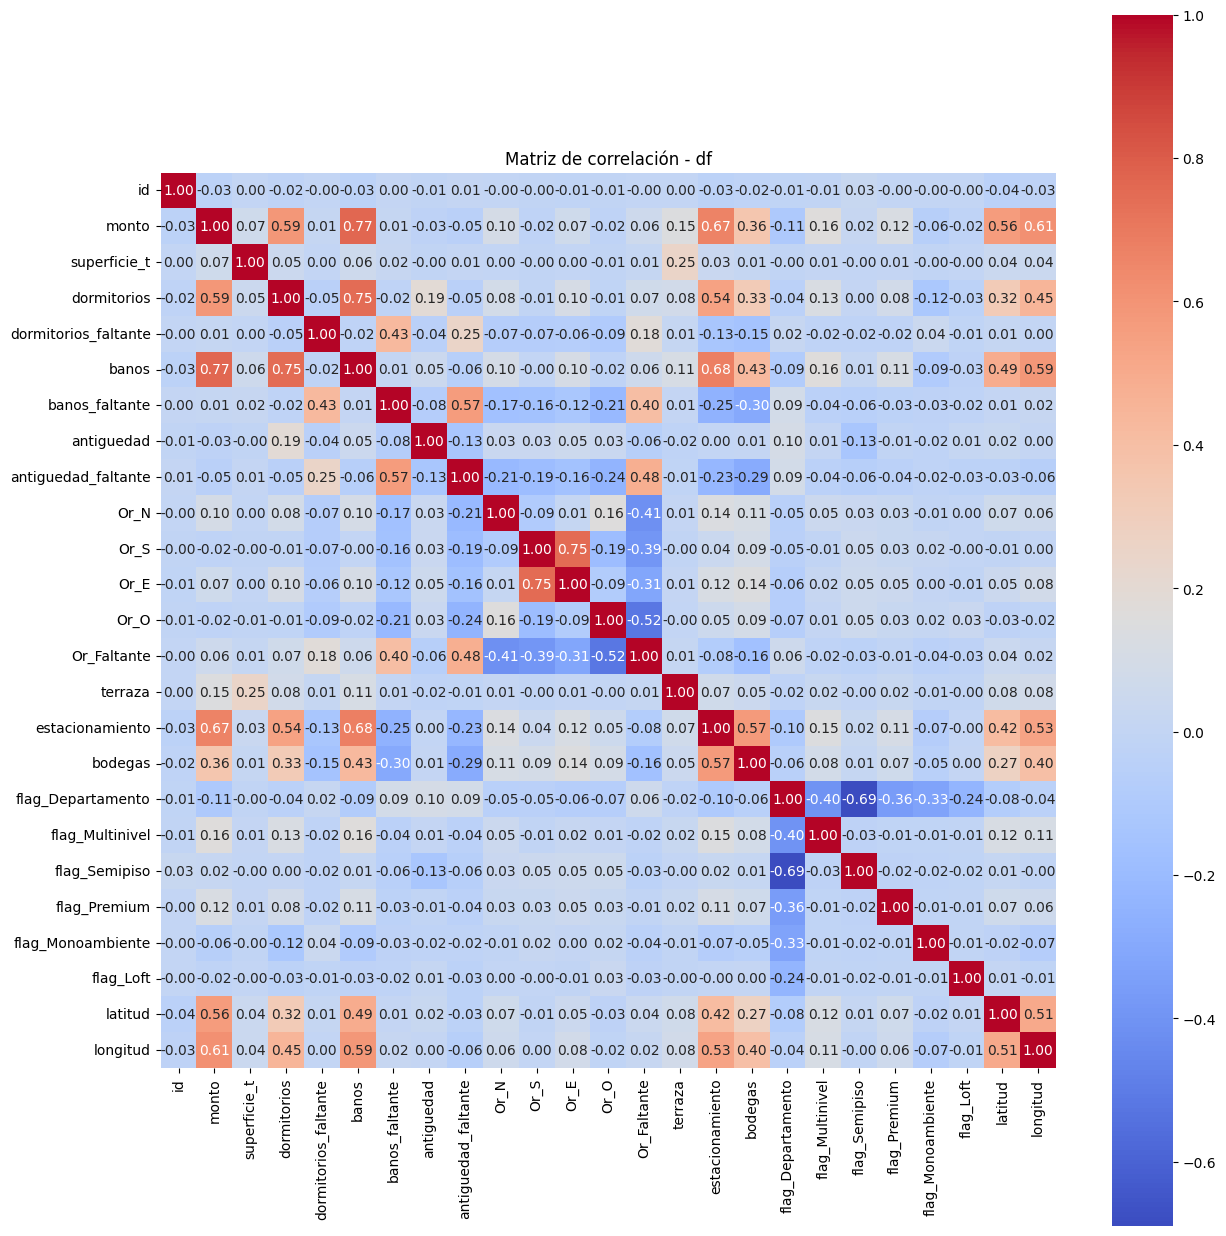

In [13]:
# Crear matriz de correlación
correlation_matrix = df.corr(numeric_only=True)

# Graficar la matriz de correlación
plt.figure(figsize=(13, 13))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de correlación - df")
plt.tight_layout()
plt.show()

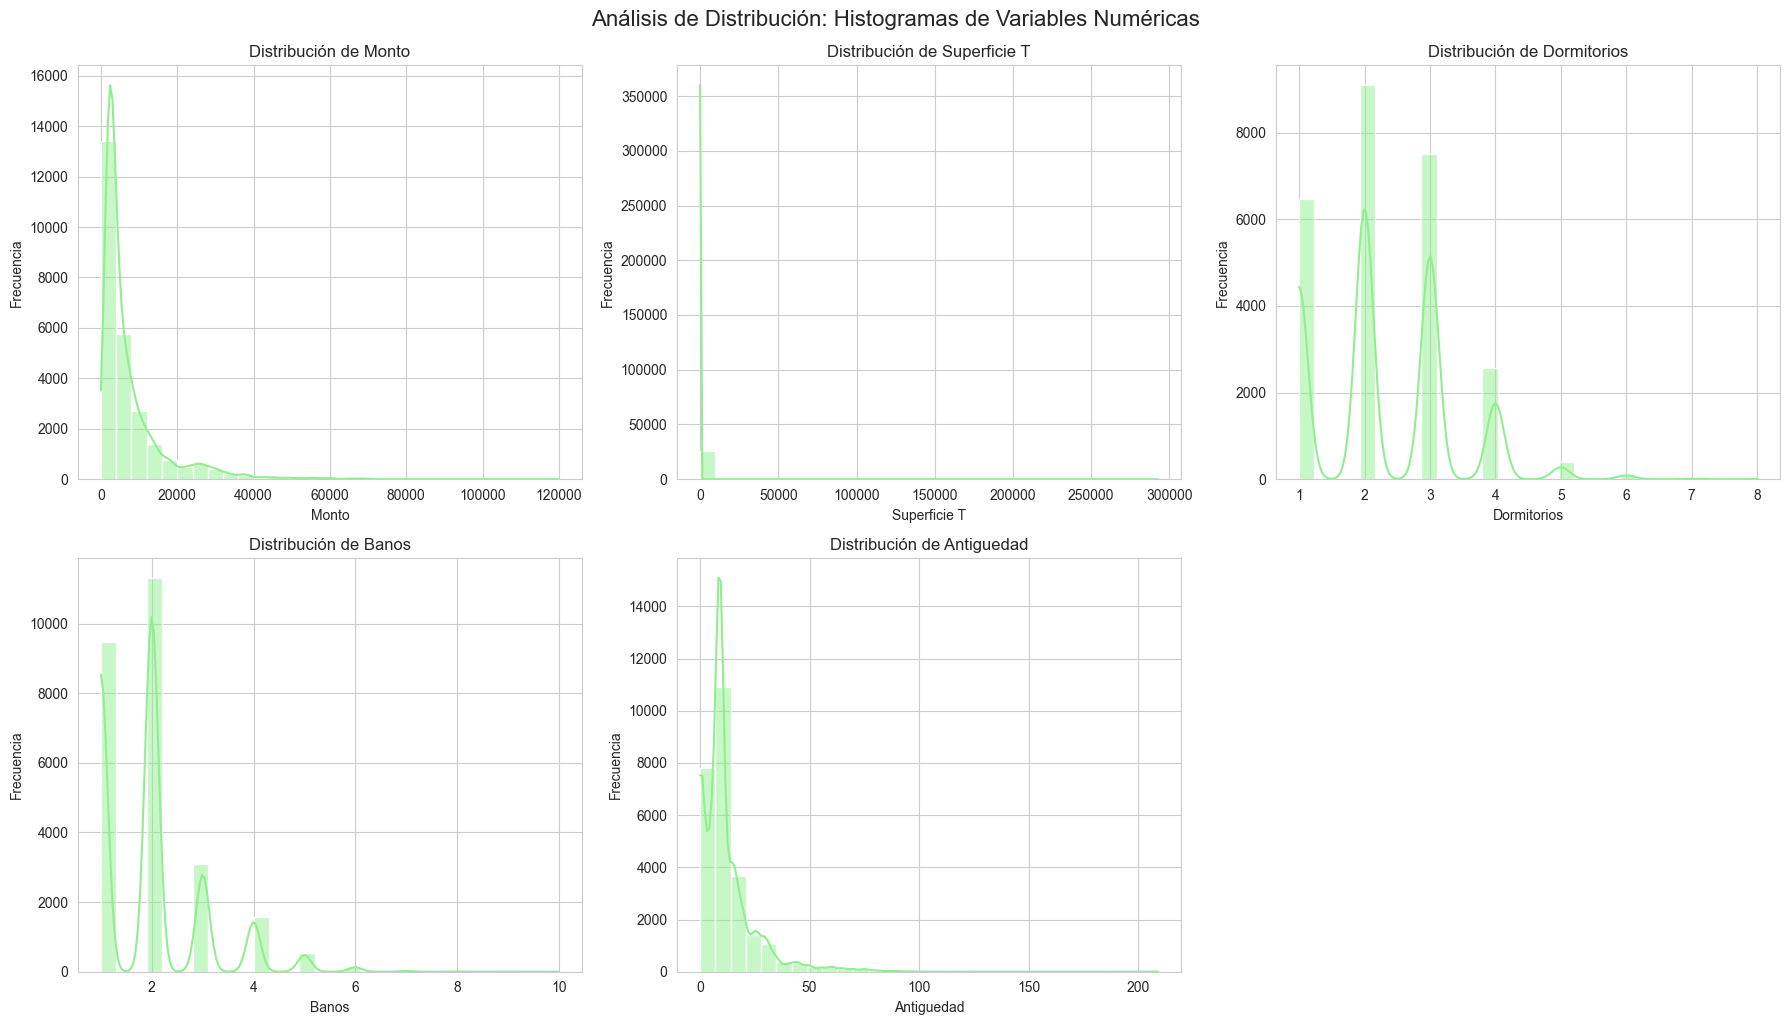

In [9]:
# Variables numéricas clave a visualizar
numeric_cols = ['monto', 'superficie_t', 'dormitorios', 'banos', 'antiguedad']

# Configuración del estilo de los gráficos
sns.set_style("whitegrid")

# Crear una figura y un conjunto de subplots para los histogramas
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols # Calcula las filas necesarias

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5)) # Ajusta el tamaño de la figura
axes = axes.flatten() # Aplanar el array de axes para fácil iteración

# Generar histplots para cada variable numérica
for i, col in enumerate(numeric_cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i], color='lightgreen', bins=30)
    axes[i].set_title(f'Distribución de {col.replace("_", " ").title()}', fontsize=12)
    axes[i].set_xlabel(col.replace("_", " ").title())
    axes[i].set_ylabel('Frecuencia')

# Ocultar los subplots vacíos si los hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() # Ajustar el diseño para evitar superposiciones
plt.suptitle('Análisis de Distribución: Histogramas de Variables Numéricas', y=1.02, fontsize=16) # Título general
plt.show()

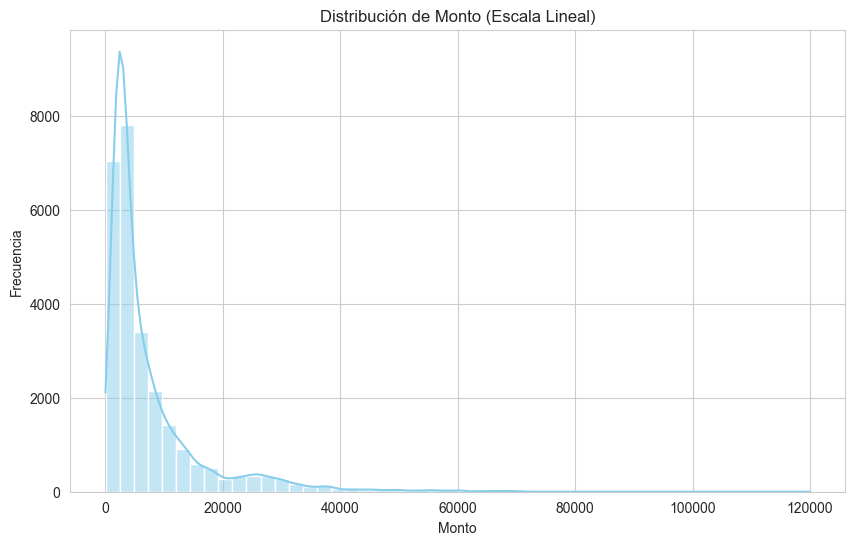

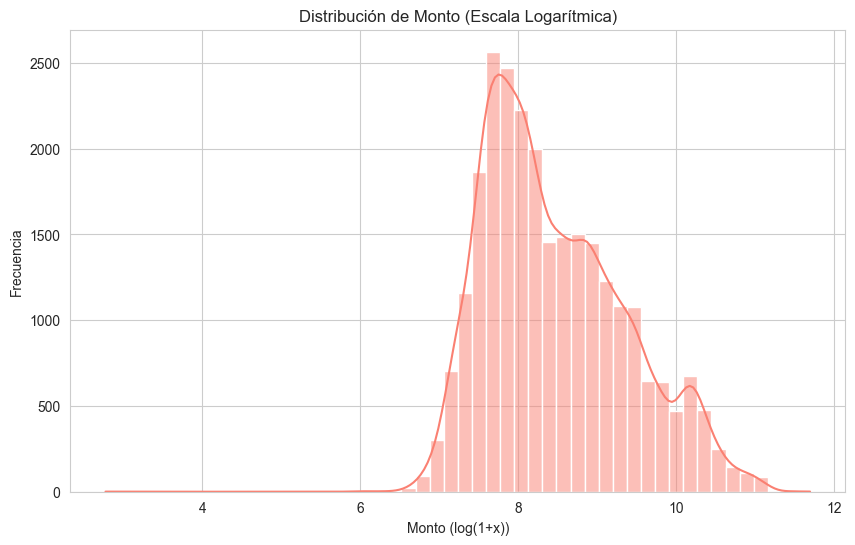

In [10]:
# Histograma de Monto (Escala Lineal)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='monto', kde=True, color='skyblue', bins=50)
plt.title('Distribución de Monto (Escala Lineal)')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.ticklabel_format(style='plain', axis='x') # Evita notación científica en el eje X para monto
plt.show()

# Histograma de Monto (Escala Logarítmica)
plt.figure(figsize=(10, 6))
# Usamos np.log1p (log(1+x)) para manejar valores de 0 si los hubiera, aunque para monto no es común.
# Si todos los montos son positivos, np.log(df['monto']) también funcionaría.
sns.histplot(data=df, x=np.log1p(df['monto']), kde=True, color='salmon', bins=50)
plt.title('Distribución de Monto (Escala Logarítmica)')
plt.xlabel('Monto (log(1+x))')
plt.ylabel('Frecuencia')
plt.show()

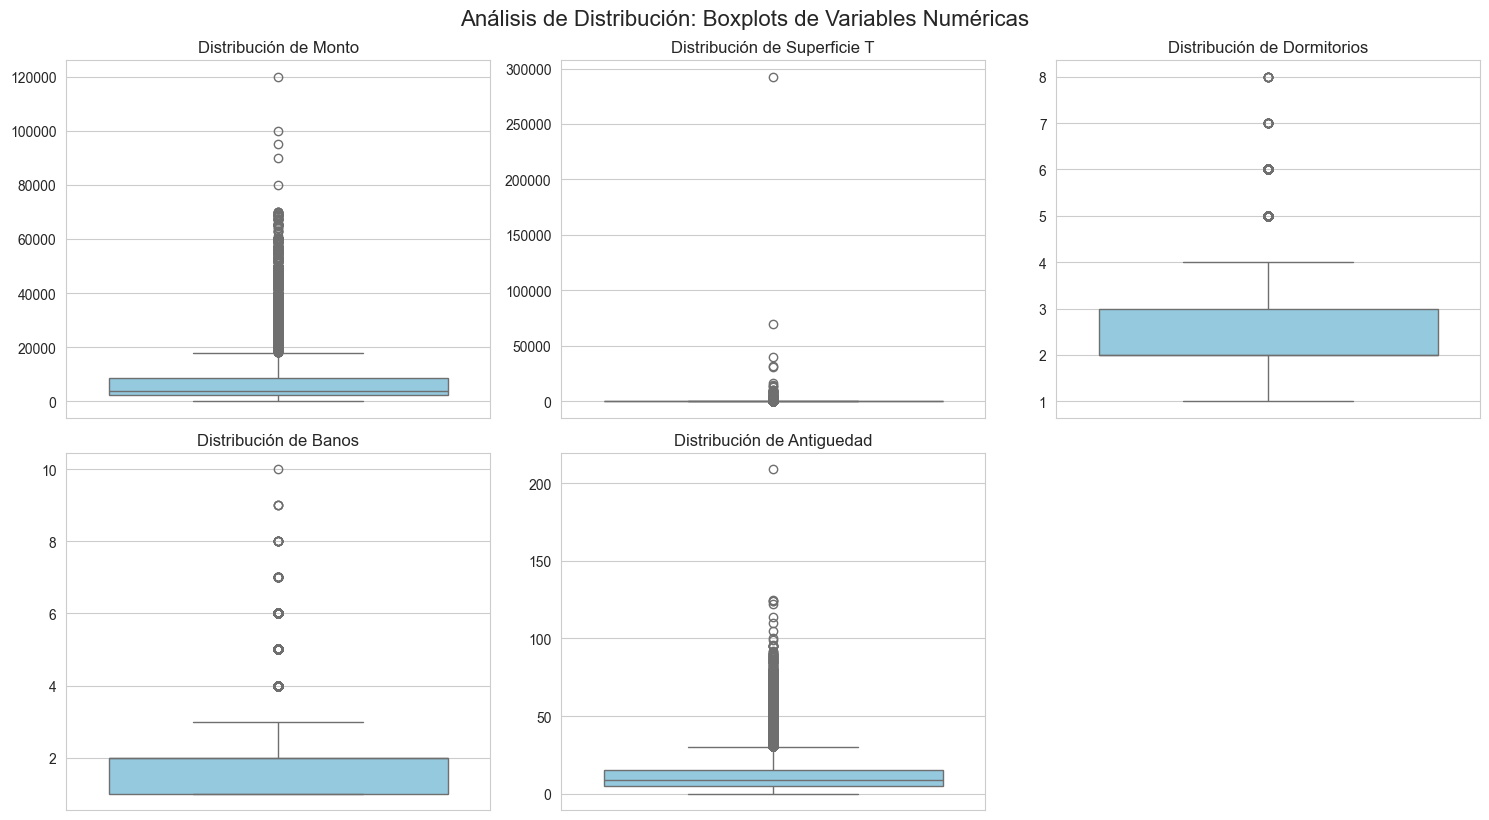

In [7]:
# Variables numéricas clave a visualizar
numeric_cols = ['monto', 'superficie_t', 'dormitorios', 'banos', 'antiguedad']

# Configuración del estilo de los gráficos
sns.set_style("whitegrid")

# Crear una figura y un conjunto de subplots
# Calculamos el número de filas y columnas necesarias.
# Por ejemplo, 3 columnas por fila parece una buena distribución.
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols # Calcula las filas necesarias

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4)) # Ajusta el tamaño de la figura
axes = axes.flatten() # Aplanar el array de axes para fácil iteración

# Generar boxplots para cada variable numérica
for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribución de {col.replace("_", " ").title()}', fontsize=12)
    axes[i].set_ylabel('') # Eliminar la etiqueta del eje y para evitar redundancia

# Ocultar los subplots vacíos si los hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() # Ajustar el diseño para evitar superposiciones
plt.suptitle('Análisis de Distribución: Boxplots de Variables Numéricas', y=1.02, fontsize=16) # Título general
plt.show()


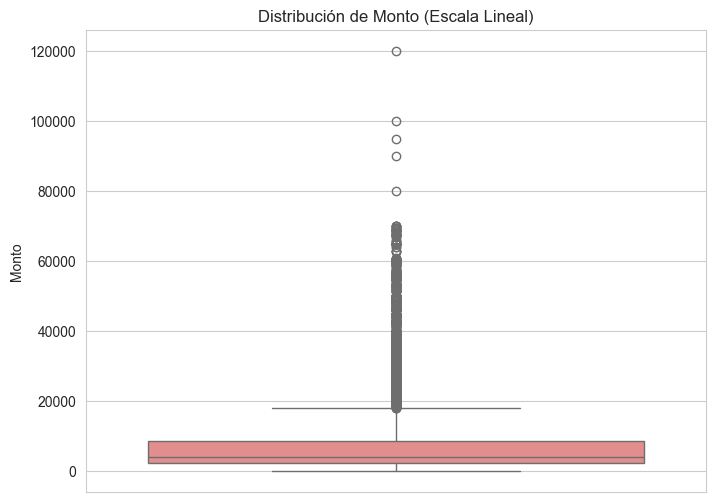

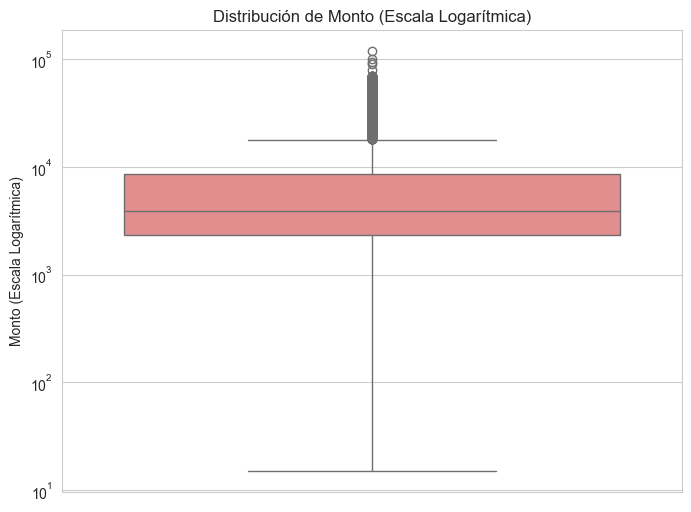

In [8]:
# --- Boxplot para Monto individualmente con escala logarítmica (opcional) ---
# Dada la alta variabilidad esperada en 'monto', un boxplot con escala logarítmica
# puede ser más informativo para visualizar su distribución y outliers.
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['monto'], color='lightcoral')
plt.title('Distribución de Monto (Escala Lineal)')
plt.ylabel('Monto')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['monto'].apply(lambda x: x if x > 0 else 1), color='lightcoral') # Evitar log(0)
plt.yscale('log')
plt.title('Distribución de Monto (Escala Logarítmica)')
plt.ylabel('Monto (Escala Logarítmica)')
plt.show()

In [20]:
df_sorted_by_superficie = df.sort_values(by='superficie_t', ascending=False)
df_sorted_by_superficie.head(70)

,id,monto,superficie_t,dormitorios,dormitorios_faltante,banos,banos_faltante,antiguedad,antiguedad_faltante,Or_N,Or_S,Or_E,Or_O,Or_Faltante,terraza,estacionamiento,bodegas,flag_Departamento,flag_Multinivel,flag_Semipiso,flag_Premium,flag_Monoambiente,flag_Loft,latitud,longitud,comuna,calle
169,2794914580,15908,292675.00,3,0,2,1,9,1,0,0,0,0,1,0.00,0,0,1,0,0,0,0,0,-33.39,-70.58,Vitacura,Nueva Querétaro
3624,2861893124,40500,69718.00,5,0,5,0,0,0,0,0,0,0,1,32543.00,0,1,1,0,0,0,0,0,-33.37,-70.55,Vitacura,Vía Aurora
4415,1572081245,1281,40000.00,1,0,10,0,9,1,1,1,1,1,0,0.00,0,0,1,0,0,0,0,0,-33.45,-70.67,Santiago,Gorbea
4181,2739422928,26500,32230.00,2,1,2,1,9,1,0,0,0,0,1,6270.00,0,0,1,0,0,0,0,0,-33.37,-70.52,Vitacura,Avenida Club De Campo
24883,1591466453,23500,30795.00,6,0,2,1,9,1,0,0,0,0,1,2588.00,0,0,1,0,0,0,0,0,-33.41,-70.60,Las Condes,Isidora Goyenechea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3446,1592056487,65000,1157.00,4,0,6,0,4,0,1,0,0,0,0,722.00,4,1,1,0,0,0,0,0,-33.38,-70.52,Las Condes,Paul Harris
3782,1589049495,35999,1148.00,4,0,6,0,17,0,0,1,1,0,0,623.00,4,2,0,1,0,0,0,0,-33.37,-70.55,Vitacura,Vía Aurora
14905,1568486461,9900,1025.00,3,0,3,0,0,0,0,0,0,0,1,0.00,1,1,1,0,0,0,0,0,-33.39,-70.57,Vitacura,Las Hualtatas
3767,1580865793,36000,1000.00,4,0,3,0,14,0,1,0,0,1,0,0.00,3,1,1,0,0,0,0,0,-33.37,-70.54,Vitacura,Raimundo Larraín


In [23]:
# Definir un umbral máximo razonable para la superficie_t para modelado predictivo
# Este umbral debe ser ajustado en base a tu análisis de distribución y conocimiento del dominio.
umbral_max_superficie_para_modelo = 400 # metros cuadrados

# Filtrar el DataFrame, creando una nueva copia para el modelado
df_para_modelo = df[df['superficie_t'] <= umbral_max_superficie_para_modelo].copy()

print(f"Número total de departamentos original: {len(df)}")
print(f"Número de departamentos para el modelo (superficie_t <= {umbral_max_superficie_para_modelo}m²): {len(df_para_modelo)}")
print(f"Departamentos eliminados: {len(df) - len(df_para_modelo)}")

Número total de departamentos original: 26189
Número de departamentos para el modelo (superficie_t <= 400m²): 25302
Departamentos eliminados: 887


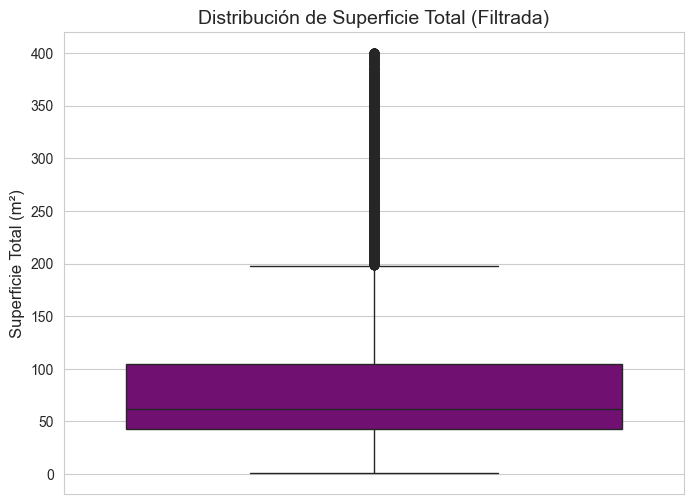

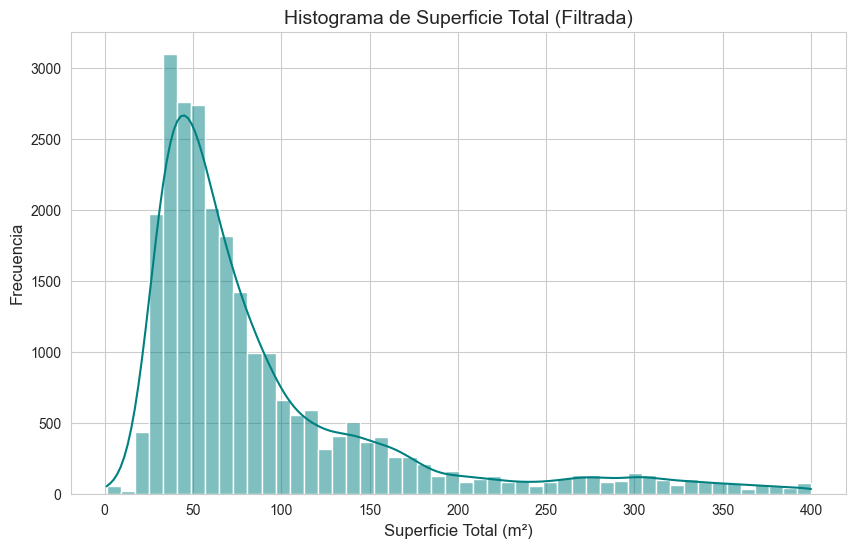

In [24]:
sns.set_style("whitegrid")

# --- Boxplot para superficie_t ---
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_para_modelo['superficie_t'], color='purple')
plt.title('Distribución de Superficie Total (Filtrada)', fontsize=14)
plt.ylabel('Superficie Total (m²)', fontsize=12)
plt.show()

# --- Histograma para superficie_t ---
plt.figure(figsize=(10, 6))
sns.histplot(data=df_para_modelo, x='superficie_t', kde=True, color='teal', bins=50)
plt.title('Histograma de Superficie Total (Filtrada)', fontsize=14)
plt.xlabel('Superficie Total (m²)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

### Justificación de la Eliminación de Outliers en superficie_t
La decisión de eliminar departamentos con superficies totales extremadamente altas (superiores a 400 m²) se justifica por la necesidad de construir un modelo predictivo de precios robusto y preciso para el segmento de mercado más representativo. Si bien existen modelos avanzados capaces de capturar la relación entre la ubicación y las dimensiones atípicas sin comprometer significativamente la precisión general, la realidad de nuestros datos es que varios de estos casos anómalos corresponden a errores de ingreso. Por ejemplo, mientras un departamento de 1000 m² en una comuna exclusiva como Lo Barnechea (Lo Curro) podría ser una propiedad de lujo legítima, un valor similar en una comuna como Estación Central, con características urbanas muy distintas, es altamente improbable y sugiere un dato erróneo. La inclusión de estos valores atípicos, que constituyen un porcentaje mínimo del dataset pero poseen una variabilidad desproporcionada y a menudo incorrecta, podría sesgar el modelo, disminuyendo su capacidad para capturar los patrones de precios en la vasta mayoría de los departamentos válidos y representativos. Al concentrar el análisis en un rango de superficies más homogéneo y confiable, se mejora la eficiencia del modelo y su interpretabilidad, asegurando que las predicciones sean más confiables para el grueso de las transacciones.

In [25]:
df_para_modelo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25302 entries, 0 to 26188
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    25302 non-null  int64  
 1   monto                 25302 non-null  int64  
 2   superficie_t          25302 non-null  float64
 3   dormitorios           25302 non-null  int64  
 4   dormitorios_faltante  25302 non-null  int64  
 5   banos                 25302 non-null  int64  
 6   banos_faltante        25302 non-null  int64  
 7   antiguedad            25302 non-null  int64  
 8   antiguedad_faltante   25302 non-null  int64  
 9   Or_N                  25302 non-null  int64  
 10  Or_S                  25302 non-null  int64  
 11  Or_E                  25302 non-null  int64  
 12  Or_O                  25302 non-null  int64  
 13  Or_Faltante           25302 non-null  int64  
 14  terraza               25302 non-null  float64
 15  estacionamiento       25

In [26]:
df_para_modelo.describe()

,id,monto,superficie_t,dormitorios,dormitorios_faltante,banos,banos_faltante,antiguedad,antiguedad_faltante,Or_N,Or_S,Or_E,Or_O,Or_Faltante,terraza,estacionamiento,bodegas,flag_Departamento,flag_Multinivel,flag_Semipiso,flag_Premium,flag_Monoambiente,flag_Loft,latitud,longitud
count,25302.00,25302.00,25302.00,25302.00,25302.00,25302.00,25302.00,25302.00,25302.00,25302.00,25302.00,25302.00,25302.00,25302.00,25302.00,25302.00,25302.00,25302.00,25302.00,25302.00,25302.00,25302.00,25302.00,25302.00,25302.00
mean,2248670251.24,6457.17,89.99,2.25,0.03,1.89,0.09,12.16,0.22,0.23,0.22,0.15,0.33,0.35,10.48,0.80,0.53,0.92,0.01,0.04,0.01,0.01,0.01,-33.44,-70.62
std,627653804.65,6656.90,74.82,0.99,0.16,0.91,0.28,12.64,0.41,0.42,0.41,0.36,0.47,0.48,37.48,0.92,0.54,0.28,0.11,0.20,0.10,0.10,0.07,0.04,0.05
min,1359204515.00,15.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-33.65,-70.83
25%,1580852979.00,2300.00,43.00,1.00,0.00,1.00,0.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,-33.46,-70.65
50%,2753150697.00,3791.00,62.00,2.00,0.00,2.00,0.00,9.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,-33.44,-70.63
75%,2850979311.50,7950.00,105.00,3.00,0.00,2.00,0.00,15.00,0.00,0.00,0.00,0.00,1.00,1.00,9.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,-33.42,-70.58
max,2864912270.00,120000.00,400.00,8.00,1.00,8.00,1.00,209.00,1.00,1.00,1.00,1.00,1.00,1.00,3500.00,10.00,5.00,1.00,1.00,1.00,1.00,1.00,1.00,-33.28,-70.49



Comenzando el entrenamiento del modelo...
Epoch 1/50
570/570 [==============================] - 5s 5ms/step - loss: 0.2809 - root_mean_squared_error: 0.5300 - val_loss: 0.0710 - val_root_mean_squared_error: 0.2664
Epoch 2/50
570/570 [==============================] - 3s 4ms/step - loss: 0.0567 - root_mean_squared_error: 0.2380 - val_loss: 0.0536 - val_root_mean_squared_error: 0.2315
Epoch 3/50
570/570 [==============================] - 2s 4ms/step - loss: 0.0628 - root_mean_squared_error: 0.2507 - val_loss: 0.0536 - val_root_mean_squared_error: 0.2316
Epoch 4/50
570/570 [==============================] - 2s 4ms/step - loss: 0.0557 - root_mean_squared_error: 0.2360 - val_loss: 0.0827 - val_root_mean_squared_error: 0.2875
Epoch 5/50
570/570 [==============================] - 2s 4ms/step - loss: 0.0567 - root_mean_squared_error: 0.2382 - val_loss: 0.1631 - val_root_mean_squared_error: 0.4039
Epoch 6/50
570/570 [==============================] - 2s 4ms/step - loss: 0.0607 - root_mean_squa

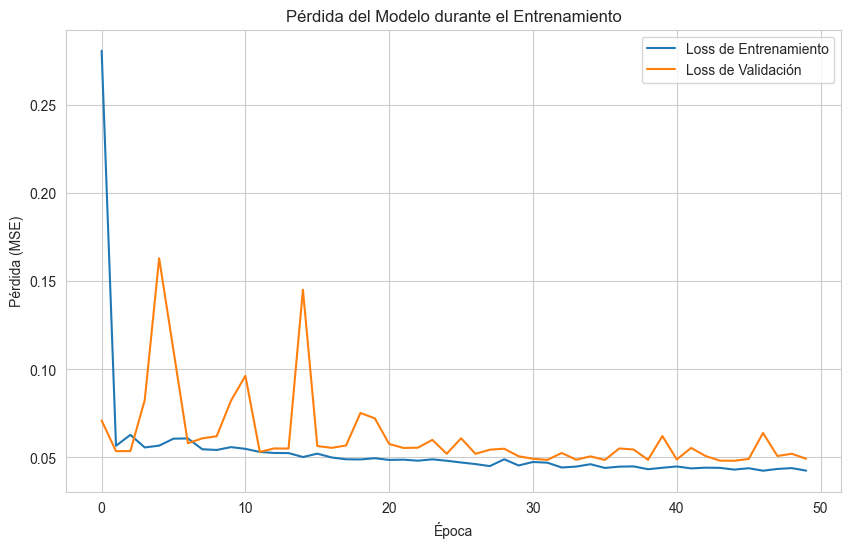

In [27]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError

# --- 1. Preparación de Datos (asegúrate de que df_para_modelo esté listo) ---
# df_para_modelo debe ser tu DataFrame con 25302 datos y la columna 'superficie_t' ya filtrada a <= 400m².

# Identificación de variables
target = 'monto'
# Excluimos 'id' y 'calle' por no ser útiles directamente para el modelo en este formato
# Las flags _faltante ya deberían estar en 0 o 1
# Las columnas Or_N, Or_S, Or_E, Or_O, Or_Faltante son flags de orientación, se mantendrán
numerical_features = ['superficie_t', 'dormitorios', 'banos', 'antiguedad',
                      'terraza', 'estacionamiento', 'bodegas',
                      'dormitorios_faltante', 'banos_faltante', 'antiguedad_faltante']

categorical_features = ['comuna'] # 'comuna' es la única categórica que queda explícita

# Separar características (X) y objetivo (y)
X = df_para_modelo.drop(columns=[target, 'id', 'calle'])
y = df_para_modelo[target]

# Opcional: Aplicar transformación logarítmica al monto si la asimetría es un problema
# Esto es muy recomendable para montos, como hemos discutido
y = np.log1p(y) # Usamos log1p para manejar ceros si los hubiera, y para suavizar la distribución

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocesamiento: Escalar numéricas y One-Hot Encode categóricas
# Usa ColumnTransformer para aplicar diferentes transformaciones a diferentes columnas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Mantener columnas no especificadas (flags, etc.)
)

# Crear un Pipeline para aplicar el preprocesamiento
# El pipeline también nos da una X_train y X_test ya transformadas
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# --- 2. Construcción del Modelo de Red Neuronal ---

model = Sequential([
    # Capa de entrada (número de neuronas = número de características después del preprocesamiento)
    Dense(128, activation='relu', input_shape=(X_train_processed.shape[1],)),
    Dense(64, activation='relu'),
    # Capa de salida: 1 neurona para la predicción de monto (regresión lineal)
    # Sin función de activación para una salida lineal, adecuada para problemas de regresión
    Dense(1)
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), # Adam es un optimizador robusto
              loss=MeanSquaredError(),              # MSE para regresión
              metrics=[RootMeanSquaredError()])     # RMSE es más interpretable que MSE

# --- 3. Entrenamiento del Modelo ---
print("\nComenzando el entrenamiento del modelo...")
history = model.fit(
    X_train_processed, y_train,
    epochs=50,       # Número de pasadas sobre el dataset
    batch_size=32,   # Número de muestras por actualización de gradiente
    validation_split=0.1, # Usar 10% del conjunto de entrenamiento para validación
    verbose=1        # Muestra el progreso del entrenamiento
)
print("Entrenamiento completado.")

# --- 4. Evaluación del Modelo ---
print("\nEvaluando el modelo en el conjunto de prueba...")
loss, rmse = model.evaluate(X_test_processed, y_test, verbose=0)
print(f"Pérdida (MSE) en el conjunto de prueba: {loss:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE) en el conjunto de prueba: {rmse:.4f}")

# Si aplicamos logaritmo al monto, el RMSE está en la escala logarítmica.
# Para interpretar en la escala original, debemos aplicar np.expm1 (exp(x) - 1)
print(f"RMSE en la escala original (aproximado): {np.expm1(rmse):.2f}")

# --- 5. Visualización del Historial de Entrenamiento (Opcional) ---
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Loss de Entrenamiento')
plt.plot(history.history['val_loss'], label='Loss de Validación')
plt.title('Pérdida del Modelo durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida (MSE)')
plt.legend()
plt.show()

# --- 6. Predicciones (Ejemplo) ---
# Puedes hacer predicciones en datos nuevos (X_new_processed)
# predictions_log = model.predict(X_new_processed)
# predictions_original_scale = np.expm1(predictions_log)